In [1]:
import matplotlib.pyplot as plt
import pickle5 as pickle

In [2]:
def rolling_mean(data, offset):
    offset_ctr = 0
    window = 0
    data_rm = []
    for i, loss in enumerate(data):
        window += loss
        if offset_ctr == offset:
            data_rm.append(window / offset)
            window = 0
            offset_ctr = 0
        offset_ctr += 1
    return data_rm

In [3]:
def create_graph(src_file, out_file, offset=172):
    src_file = "./losses/" + src_file
    a = 0
    with open(src_file, "rb") as f:
        a = pickle.load(f)
    gen_loss = rolling_mean(a[0], offset)
    disc_loss = rolling_mean(a[1], offset)
    lr_gen = rolling_mean(a[2], 1)
    lr_disc = rolling_mean(a[3], 1)
    plt.plot(gen_loss, label="Generator loss")
    plt.plot(disc_loss, label="Discriminator loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Rolling average, window size "+str(offset))
    plt.legend()
    plt.savefig(out_file+".png")
    plt.show()
    
    plt.xlabel("Iterations")
    plt.ylabel("LR")
    plt.title("Learning rate")
    plt.plot(lr_gen[1:], label="Learning rate generator")
    plt.plot(lr_disc[1:], label="Learning rate discriminator")
    plt.legend()
    plt.yscale("log")
    plt.savefig("LR"+out_file+".png")
    plt.show()
    

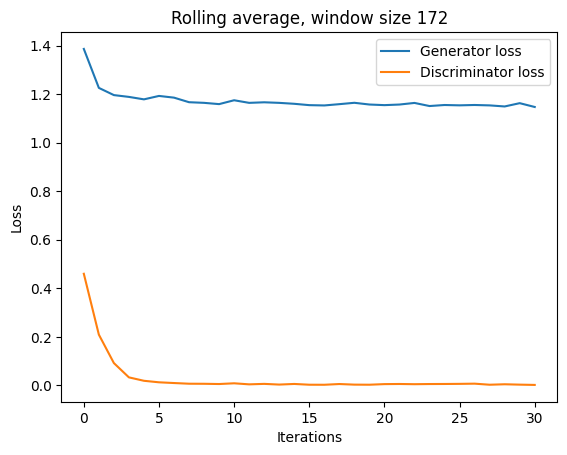

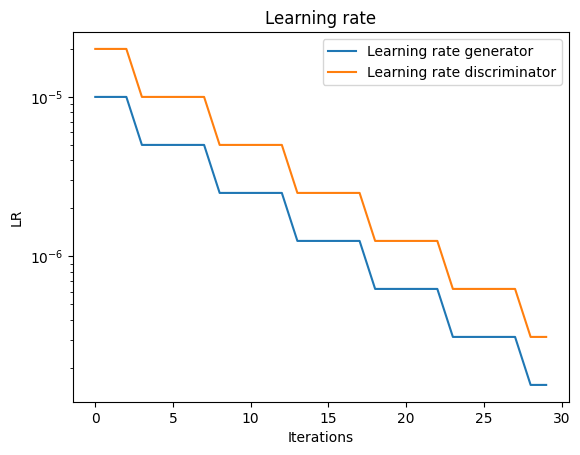

In [5]:
create_graph("scratch5delay1e5", "scratch5delay1e5")

8428


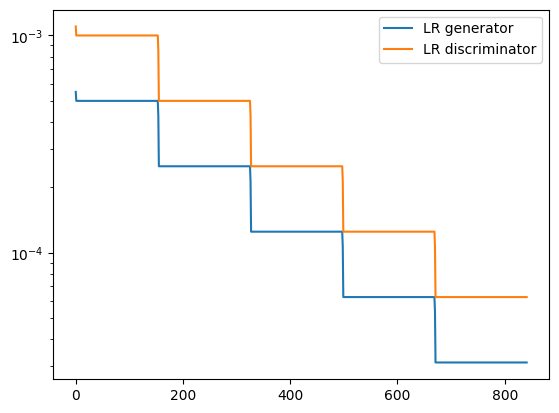

In [65]:
init_lr = 5e-4
init_lr_d = 2*init_lr
gamma = 0.5
epoch_step = 10
epoch_size = 172
lr = [[], []]
for i in range(1, 50):
    if i % epoch_step == 0:
        init_lr *= gamma
        init_lr_d *= gamma
    for _ in range(epoch_size):
        lr[0].append(init_lr)
        lr[1].append(init_lr_d)

print(len(lr[0]))
ll = rolling_mean(lr[0], 10)
llg = rolling_mean(lr[1], 10)
plt.plot(ll, label="LR generator")
plt.plot(llg, label="LR discriminator")
plt.legend()

plt.yscale('log')
plt.savefig("LR1e8.png")
plt.show()